In [1]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=67b5ef061f2076fffce735de7e92aac10bf0062c2edc7ee9748e320a4ab476d0
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [2]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
!wget https://github.com/ihpar/ibu_cv/raw/main/mnist/m_nist.zip

--2022-04-16 20:31:13--  https://github.com/ihpar/ibu_cv/raw/main/mnist/m_nist.zip
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ihpar/ibu_cv/main/mnist/m_nist.zip [following]
--2022-04-16 20:31:14--  https://raw.githubusercontent.com/ihpar/ibu_cv/main/mnist/m_nist.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9851296 (9.4M) [application/zip]
Saving to: ‘m_nist.zip’

m_nist.zip          100%[===================>]   9.39M  --.-KB/s    in 0.1s    

2022-04-16 20:31:15 (85.1 MB/s) - ‘m_nist.zip’ saved [9851296/9851296]



In [4]:
!unzip /content/m_nist.zip -d m_nist

Archive:  /content/m_nist.zip
  inflating: m_nist/train-images-idx3-ubyte  
  inflating: m_nist/train-labels-idx1-ubyte  


In [5]:
MNIST_DIR = "/content/m_nist/"

In [6]:
train_arr = idx2numpy.convert_from_file(MNIST_DIR + "train-images-idx3-ubyte")
train_labels = idx2numpy.convert_from_file(MNIST_DIR + "train-labels-idx1-ubyte")

In [7]:
print(train_arr.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [8]:
X_train = train_arr.reshape(60000, -1)
X_train.shape

(60000, 784)

In [9]:
X_train = X_train / 255.0

In [51]:
y_train_org = np.copy(train_labels)

# Odev

In [11]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [12]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        ones_column = np.ones((num_samples, 1))
        X = np.append(ones_column, X, axis=1)
        self.weights = np.zeros(num_features + 1)

        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights)
            y_predicted = sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            self.weights = self.weights - (self.lr * dw)

    def predict(self, X):
        num_samples, _ = X.shape
        ones_column = np.ones((num_samples, 1))
        X = np.append(ones_column, X, axis=1)
        
        linear_model = np.dot(X, self.weights)
        y_predicted = sigmoid(linear_model)
        y_predicted_classes = np.where(y_predicted > 0.5, 1, 0)
        return y_predicted_classes

In [13]:
def accuracy(y_true, y_predicted):
    acc = np.sum(y_true == y_predicted) / len(y_predicted)
    return acc

In [14]:
X_2 = X_train[y_train_org == 2]
X_2.shape

(5958, 784)

In [15]:
X_3 = X_train[y_train_org == 3]
X_3.shape

(6131, 784)

In [16]:
X_4 = X_train[y_train_org == 4]
X_4.shape

(5842, 784)

In [17]:
X_5 = X_train[y_train_org == 5]
X_5.shape

(5421, 784)

In [18]:
X_train_subset = np.append(X_2, X_3, axis=0)

In [19]:
X_train_subset = np.append(X_train_subset, X_4, axis=0)

In [20]:
X_train_subset = np.append(X_train_subset, X_5, axis=0)

In [21]:
X_train_subset.shape

(23352, 784)

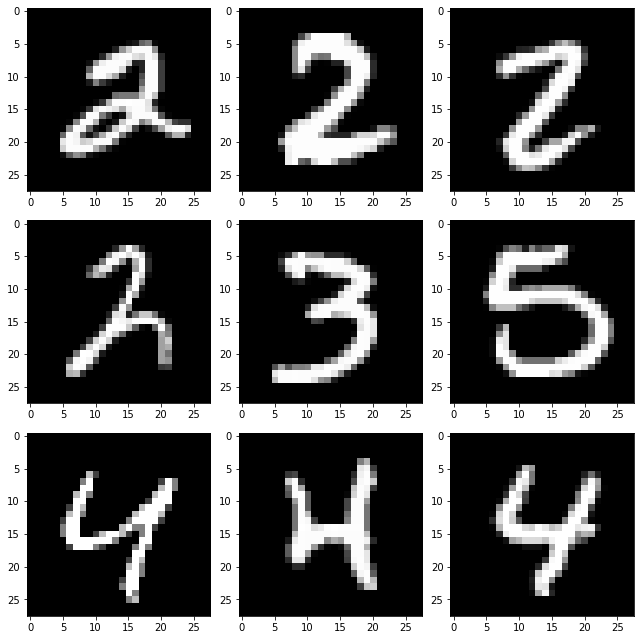

In [22]:
ds_check_indexes = [0, 1000, 5000, 5200, 6200, 22000, 12300, 17301, 12395]

plt.figure(figsize=(9, 9))

for i, index in enumerate(ds_check_indexes):
    plt.subplot(3, 3, i+1)

    plt.imshow(X_train_subset[index].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()

# 2 rakamini siniflandiran logistic siniflandiricinin olusturulmasi

In [23]:
y_2 = np.ones(X_2.shape[0])
y_3 = np.zeros(X_3.shape[0])
y_4 = np.zeros(X_4.shape[0])
y_5 = np.zeros(X_5.shape[0])
y_train_subset = np.concatenate((y_2,y_3,y_4,y_5))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=42)

In [25]:
regressor_2 = LogisticRegression(lr=0.001, n_iters=3000) # accuracy arttirmak icin iterasyon sayisi 3000 yapildi
regressor_2.fit(X_train, y_train)

y_predictions = regressor_2.predict(X_test)
print(accuracy(y_test, y_predictions))

0.944551487904089


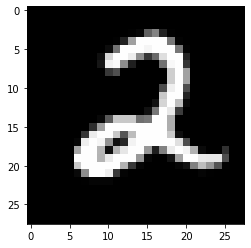

In [26]:
ornek = X_train_subset[334]
plt.imshow(ornek.reshape(28, 28), cmap="gray")

In [27]:
ornek = ornek.reshape(1,784)

In [28]:
predict = regressor_2.predict(ornek)
predict

array([1])

# 3 rakamini siniflandiran logistic siniflandiricinin olusturulmasi




In [29]:
y_2 = np.zeros(X_2.shape[0])
y_3 = np.ones(X_3.shape[0])
y_4 = np.zeros(X_4.shape[0])
y_5 = np.zeros(X_5.shape[0])
y_train_subset = np.concatenate((y_2,y_3,y_4,y_5))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=42)

In [32]:
regressor_3 = LogisticRegression(lr=0.001, n_iters=3000) # accuracy arttirmak icin iterasyon sayisi 3000 yapildi
regressor_3.fit(X_train, y_train)

y_predictions = regressor_3.predict(X_test)
print(accuracy(y_test, y_predictions))

0.9128666238492829


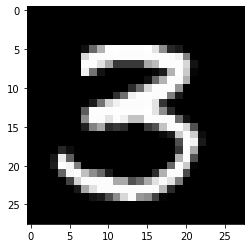

In [33]:
ornek = X_train_subset[8384]
plt.imshow(ornek.reshape(28, 28), cmap="gray")

In [34]:
ornek = ornek.reshape(1,784)
predict = regressor_3.predict(ornek)
predict

array([1])

# 4 rakamini siniflandiran logistic siniflandiricinin olusturulmasi


In [35]:
y_2 = np.zeros(X_2.shape[0])
y_3 = np.zeros(X_3.shape[0])
y_4 = np.ones(X_4.shape[0])
y_5 = np.zeros(X_5.shape[0])
y_train_subset = np.concatenate((y_2,y_3,y_4,y_5))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=42)

In [37]:
regressor_4 = LogisticRegression(lr=0.001, n_iters=3000) # accuracy arttirmak icin iterasyon sayisi 3000 yapildi
regressor_4.fit(X_train, y_train)

y_predictions = regressor_4.predict(X_test)
print(accuracy(y_test, y_predictions))

0.9633911368015414


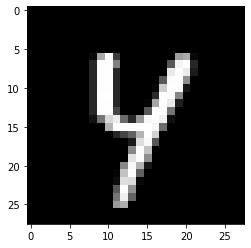

In [38]:
ornek = X_train_subset[15847]
plt.imshow(ornek.reshape(28, 28), cmap="gray")

In [39]:
ornek = ornek.reshape(1,784)
predict = regressor_4.predict(ornek)
predict

array([1])

# 5 rakamini siniflandiran logistic siniflandiricinin olusturulmasi

In [40]:
y_2 = np.zeros(X_2.shape[0])
y_3 = np.zeros(X_3.shape[0])
y_4 = np.zeros(X_4.shape[0])
y_5 = np.ones(X_5.shape[0])
y_train_subset = np.concatenate((y_2,y_3,y_4,y_5))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=42)

In [42]:
regressor_5 = LogisticRegression(lr=0.001, n_iters=3000) # accuracy arttirmak icin iterasyon sayisi 3000 yapildi
regressor_5.fit(X_train, y_train)

y_predictions = regressor_5.predict(X_test)
print(accuracy(y_test, y_predictions))

0.8998073217726397


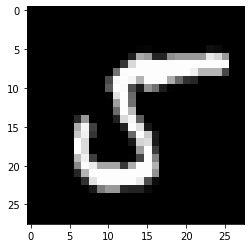

In [43]:
ornek = X_train_subset[21500]
plt.imshow(ornek.reshape(28, 28), cmap="gray")

In [44]:
ornek = ornek.reshape(1,784)
predict = regressor_5.predict(ornek)
predict

array([1])

In [59]:
def hangi_rakam(image):
  plt.imshow(image.reshape(28, 28), cmap="gray")
  image = image.reshape(1,784)
  tahmin2 = regressor_2.predict(image)
  tahmin3 = regressor_3.predict(image)
  tahmin4 = regressor_4.predict(image)
  tahmin5 = regressor_5.predict(image)
  if tahmin2 == 1:
    print("Modelin Resimdeki rakam tahmini 2")
  elif tahmin3 == 1:
    print("Modelin Resimdeki rakam tahmini 3")
  elif tahmin4 == 1:
    print("Modelin Resimdeki rakam tahmini 4")
  elif tahmin5 == 1:
    print("Modelin Resimdeki rakam tahmini 5")
  else:
    print(" Modeller Rakami Siniflandiramadi")

0 ile 23351 değerleri arasinda index değeri girin :7845
Modelin Resimdeki rakam tahmini 3


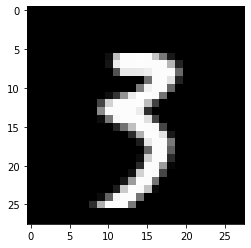

In [65]:
deger = int(input("0 ile 23351 değerleri arasinda index değeri girin :"))
hangi_rakam(X_train_subset[deger])